In [1]:
import numpy as np

In [2]:
detector_array = np.zeros((500, 500))
print(detector_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [3]:
pixel_edge_length = 15 #microns
pixel_half_length = (pixel_edge_length / 2)
num_of_pixels = 500
num_of_pixel_x = 500
num_of_pixel_y = 500
electrons_per_photon = 1500 #electrons

In [4]:
def bottom_left_of_pixel():
    pixel_corner_i = i * pixel_edge_length
    pixel_corner_j = j * pixel_edge_length

In [5]:
#i = the row value of pixel
#j = the column value of pixel
#horz_d= horizontal distance from bottom left
#vert_d= vertical distance from bottom left
def center_of_pixel(pixel_edge_length, i, j):
    horz_d = (i * pixel_edge_length) + pixel_half_length
    vert_d = (j * pixel_edge_length) + pixel_half_length
    #print("pixel: [" + str(i) + ", " + str(j) + "], center of pixel: [" + str(horz_d) + ", " + str(vert_d) + "] microns.")
for i in range(len(detector_array)):
    for j in range(len(detector_array)):
        center_of_pixel(pixel_edge_length, i, j)   

In [6]:
import random
#the random.random() makes a random number between 0 & 1, so we multiply it to get the range we want
photon_sphere_x = random.random() * pixel_edge_length * num_of_pixel_x #microns
photon_sphere_y = random.random() * pixel_edge_length * num_of_pixel_y #microns
photon_sphere_z = 15 #microns
print("photon hit at [x,y] = [" + str(photon_sphere_x) + ", " + str(photon_sphere_y) + "] microns")

photon hit at [x,y] = [6775.502610534426, 5749.443140481687] microns


In [7]:
#photon_sphere_x and photon_sphere_y is the center point of the sphere
diameter_electron_cloud = 10 #microns
radius_electron_cloud = diameter_electron_cloud / 2 #microns

In [8]:
detector_array_x = np.arange(num_of_pixel_x) * pixel_edge_length + pixel_half_length
detector_array_y = np.arange(num_of_pixel_y) * pixel_edge_length + pixel_half_length
#remember multiple pixels have the same center value, but this array contains all of those possibilities

In [9]:
#redefining variables as arrays to be more precise
photon_sphere_microns = [photon_sphere_x, photon_sphere_y, photon_sphere_z]
photon_sphere_pixel = [photon_sphere_x / pixel_edge_length, photon_sphere_y / pixel_edge_length]
print("sphere position  in microns " + str(photon_sphere_microns))
print("sphere position in pixel " + str(photon_sphere_pixel))


sphere position  in microns [6775.502610534426, 5749.443140481687, 15]
sphere position in pixel [451.7001740356284, 383.2962093654458]


In [10]:
closest_pixel_x = (np.where(np.abs(detector_array_x - photon_sphere_x) == np.min(np.abs(detector_array_x - photon_sphere_x))))[0]
closest_pixel_x_microns = closest_pixel_x [0] * pixel_edge_length + pixel_half_length
closest_pixel_y = (np.where(np.abs(detector_array_y - photon_sphere_y) == np.min(np.abs(detector_array_y - photon_sphere_y))))[0]
closest_pixel_y_microns = closest_pixel_y [0] * pixel_edge_length + pixel_half_length
closest_pixel_arr = [closest_pixel_x[0], closest_pixel_y[0]]
closest_pixel_microns = [closest_pixel_x_microns, closest_pixel_y_microns]
print("closest pixel to sphere: " + str(closest_pixel_arr))
print("closest pixel's center in microns: " + str(closest_pixel_microns))

closest pixel to sphere: [451, 383]
closest pixel's center in microns: [6772.5, 5752.5]


In [11]:
#measure the distance from closest_pixel_microns to photon_sphere_microns in x and y directions
#all variables here are measured in microns
dist_sphere_pixel_x = np.abs(closest_pixel_x_microns - photon_sphere_x)
dist_sphere_pixel_y = np.abs(closest_pixel_y_microns - photon_sphere_y)
total_dist_sphere_pixel = np.sqrt((dist_sphere_pixel_x ** 2) + (dist_sphere_pixel_y ** 2))
print("distnace in x: " + str(dist_sphere_pixel_x) + " microns, " + "distance in y: " + str(dist_sphere_pixel_y) + " microns")
print("total distance from center of sphere to center of pixel: " + str(total_dist_sphere_pixel) + " microns")

distnace in x: 3.002610534425912 microns, distance in y: 3.0568595183131038 microns
total distance from center of sphere to center of pixel: 4.284864074407365 microns


In [12]:
#sm_pixel_edge_length = .5 #microns
#sm_pixel_half_length = sm_pixel_edge_length/2 #microns
#graph_num_of_pixels_x = 3
#sm_num_of_pixels = pixel_edge_length * (1 / sm_pixel_edge_length) * graph_num_of_pixels_x
#sm_num_of_pixels = 45 when sm_pixel_edge_length = 1 micron
#sm_third_pixels = sm_num_of_pixels / 3
#sm_two_thirds_pixels = sm_num_of_pixels * (2/3)
#sm_array = np.zeros ((sm_num_of_pixels, sm_num_of_pixels, sm_num_of_pixels))
#sm_x_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_x[closest_pixel_x - 1] - pixel_half_length) + sm_pixel_edge_length
#sm_y_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_y[closest_pixel_y - 1] - pixel_half_length) + sm_pixel_edge_length

In [ ]:
#setting up for numerical integration
sm_pixel_edge_length = 1 #microns
#subpixel
sm_pixel_half_length = sm_pixel_edge_length/2 #microns
sm_num_of_pixels = 45
sm_third_pixels = sm_num_of_pixels / 3
sm_two_thirds_pixels = sm_num_of_pixels * (2/3)
sm_array = np.zeros ((sm_num_of_pixels, sm_num_of_pixels, sm_num_of_pixels))
sm_x_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_x[closest_pixel_x - 1] - pixel_half_length) + sm_pixel_edge_length
sm_y_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_y[closest_pixel_y -1] - pixel_half_length) + sm_pixel_edge_length   

In [ ]:
sm_x_cen

In [15]:
detector_array_x[closest_pixel_x]

array([6772.5])

In [16]:
sm_y_cen

array([5730.5, 5731. , 5731.5, 5732. , 5732.5, 5733. , 5733.5, 5734. ,
       5734.5, 5735. , 5735.5, 5736. , 5736.5, 5737. , 5737.5, 5738. ,
       5738.5, 5739. , 5739.5, 5740. , 5740.5, 5741. , 5741.5, 5742. ,
       5742.5, 5743. , 5743.5, 5744. , 5744.5, 5745. , 5745.5, 5746. ,
       5746.5, 5747. , 5747.5, 5748. , 5748.5, 5749. , 5749.5, 5750. ,
       5750.5, 5751. , 5751.5, 5752. , 5752.5, 5753. , 5753.5, 5754. ,
       5754.5, 5755. , 5755.5, 5756. , 5756.5, 5757. , 5757.5, 5758. ,
       5758.5, 5759. , 5759.5, 5760. , 5760.5, 5761. , 5761.5, 5762. ,
       5762.5, 5763. , 5763.5, 5764. , 5764.5, 5765. , 5765.5, 5766. ,
       5766.5, 5767. , 5767.5, 5768. , 5768.5, 5769. , 5769.5, 5770. ,
       5770.5, 5771. , 5771.5, 5772. , 5772.5, 5773. , 5773.5, 5774. ,
       5774.5, 5775. ])

In [17]:
sm_z_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length

In [18]:
for i in range(sm_num_of_pixels):
    for j in range(sm_num_of_pixels):
        for k in range(sm_num_of_pixels):
            distance_to_center_of_photon = np.sqrt((sm_x_cen[i]-photon_sphere_x)**2 + \
                                                (sm_y_cen[j]-photon_sphere_y)**2 + \
                                                (sm_z_cen[k]-photon_sphere_z)**2)
            if distance_to_center_of_photon < diameter_electron_cloud/2:
                sm_array[i,j,k] = 1.

In [19]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

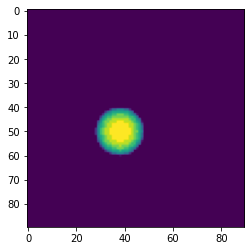

In [21]:
img = np.sum(sm_array, axis=2)
imgplot = plt.imshow(img)
#figure be self explanitory
#add legends etc. 
#voxel = 3D pixel
#add dashed lines to show pixel boarder

In [22]:
np.sum(img)

4169.0

In [23]:
percent_pixel_1 = np.sum(img[0:int(sm_third_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_2 = np.sum(img[0:int(sm_third_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_3 = np.sum(img[0:int(sm_third_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)
percent_pixel_4 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_5 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_6 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)
percent_pixel_7 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_8 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_9 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)

In [24]:
#not sure how to make the above into a loop instead of typing it out the way I did 

In [25]:
print("% in first pixel: " + str(percent_pixel_1 * 100) + "%")
print("% in second pixel: " + str(percent_pixel_2 * 100) + "%")
print("% in third pixel: " + str(percent_pixel_3 * 100) + "%")
print("% in fourth pixel: " + str(percent_pixel_4 * 100) + "%")
print("% in fifth pixel: " + str(percent_pixel_5 * 100) + "%")
print("% in sixth pixel: " + str(percent_pixel_6 * 100) + "%")
print("% in seventh pixel: " + str(percent_pixel_7 * 100) + "%")
print("% in eigth pixel: " + str(percent_pixel_8 * 100) + "%")
print("% in ninth pixel: " + str(percent_pixel_9 * 100) + "%")

% in first pixel: 0.0%
% in second pixel: 0.0%
% in third pixel: 0.0%
% in fourth pixel: 1.870952266730631%
% in fifth pixel: 98.10506116574717%
% in sixth pixel: 0.0%
% in seventh pixel: 0.0%
% in eigth pixel: 0.023986567522187575%
% in ninth pixel: 0.0%


In [26]:
detector_array[closest_pixel_x,closest_pixel_y] += percent_pixel_1 * electrons_per_photon

In [27]:
electrons_pixel_1 = round(electrons_per_photon * percent_pixel_1)
electrons_pixel_2 = round(electrons_per_photon * percent_pixel_2)
electrons_pixel_3 = round(electrons_per_photon * percent_pixel_3)
electrons_pixel_4 = round(electrons_per_photon * percent_pixel_4)
electrons_pixel_5 = round(electrons_per_photon * percent_pixel_5)
electrons_pixel_6 = round(electrons_per_photon * percent_pixel_6)
electrons_pixel_7 = round(electrons_per_photon * percent_pixel_7)
electrons_pixel_8 = round(electrons_per_photon * percent_pixel_8)
electrons_pixel_9 = round(electrons_per_photon * percent_pixel_9)

In [28]:
#can make if else statement for this, so you don't have to check the zeros
print('1. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y - 1]))
print('2. ' + str(detector_array[closest_pixel_x, closest_pixel_y - 1]))
print('3. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y - 1]))
print('4. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y]))
print('5. ' + str(detector_array[closest_pixel_x, closest_pixel_y]))
print('6. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y]))
print('7. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y + 1]))
print('8. ' + str(detector_array[closest_pixel_x, closest_pixel_y + 1]))
print('9. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y + 1]))

1. [0.]
2. [0.]
3. [0.]
4. [0.]
5. [0.]
6. [0.]
7. [0.]
8. [0.]
9. [0.]


In [29]:
detector_array[closest_pixel_x - 1, closest_pixel_y - 1] += electrons_pixel_1
detector_array[closest_pixel_x, closest_pixel_y - 1] += electrons_pixel_2
detector_array[closest_pixel_x + 1, closest_pixel_y - 1] += electrons_pixel_3
detector_array[closest_pixel_x - 1, closest_pixel_y] += electrons_pixel_4
detector_array[closest_pixel_x, closest_pixel_y] += electrons_pixel_5
detector_array[closest_pixel_x + 1, closest_pixel_y] += electrons_pixel_6
detector_array[closest_pixel_x - 1, closest_pixel_y + 1] += electrons_pixel_7
detector_array[closest_pixel_x, closest_pixel_y + 1] += electrons_pixel_8
detector_array[closest_pixel_x + 1, closest_pixel_y + 1] += electrons_pixel_9

In [30]:
print('1. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y - 1]))
print('2. ' + str(detector_array[closest_pixel_x, closest_pixel_y - 1]))
print('3. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y - 1]))
print('4. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y]))
print('5. ' + str(detector_array[closest_pixel_x, closest_pixel_y]))
print('6. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y]))
print('7. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y + 1]))
print('8. ' + str(detector_array[closest_pixel_x, closest_pixel_y + 1]))
print('9. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y + 1]))

1. [0.]
2. [0.]
3. [0.]
4. [28.]
5. [1472.]
6. [0.]
7. [0.]
8. [0.]
9. [0.]


In [31]:
#!!! sometimes this "check" doesnt work: ask if theres a better numpy function to be precise
check_tot_electrons = np.sum(detector_array)
if (check_tot_electrons == electrons_per_photon):
    print('No rounding error. total number of electrons = ' + str(electrons_per_photon))
else:
    print('***ROUNDING ERROR: total number of electrons is != ' + str(electrons_per_photon) + ". It is = " + str(check_tot_electrons))

No rounding error. total number of electrons = 1500


In [32]:
#digitize array using np.digitize
#make array values integers
#how would you find the gain if you weren't given it?
#what kind of errors are introduced?
#how many times to measure a single photon to get rid of error?
#numpy.digitize(x, bins, right=False(optional))
#numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)

#assume 2 electrons/DN
#gain = (# of electrons per pixel) / (# of counts per pixel)
#stdev (photons)  =  sqrt(number of photons)

In [33]:
gain =  2 #electrons/digital(data) number
#here the data in detector_array is still float it will become integer when digitized below
detector_array = np.round(detector_array * (1 / gain))

In [34]:
#NOTES:
#could you figure out, gain? figure out gain if the # of electrons per photon is known and output is known
#How well would you know it?  

#What kind of errors are introduced by the charge sharing and digitization? 
        # we already have a rounding error before digitization, but after digitizing it can cause errors 
        # because we have less information... we only know which pixels are "on"
#How many times do you need to measure this single photon signal to beat down those errors?

#The gain value is set by the electronics that read out the CCD chip. 
#Gain is expressed in units of electrons per count. 
#For example, a gain of 1.8 e-/count means that the camera produces 1 count for every 1.8 recorded electrons.
#Of course, we cannot split electrons into fractional parts, as in the case for a gain of 1.8 e-/count. 
#What this number means is that 4/5 of the time 1 count is produced from 2 electrons, and 1/5 of the time 1 count is produced from 1 electron. 
#This number is an average conversion ratio, based on changing large numbers of electrons into large numbers of counts.
#Note: This use of the term "gain" is in the opposite sense to the way a circuit designer would use the term since, 
#in electronic design, gain is considered to be an increase in the number of output units compared with the number of input units.

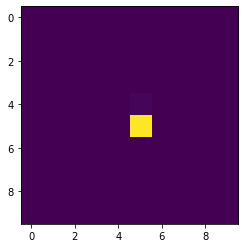

In [35]:
imgplot = plt.imshow(detector_array[int(closest_pixel_x[0]-5):int(closest_pixel_x[0] + 5), int(closest_pixel_y[0]) - 5:closest_pixel_y[0] + 5])

In [36]:
print(np.max(detector_array))

736.0


In [37]:
print(np.sum(detector_array))

750.0


In [ ]:
#find gain using sum = array/gain